## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import dataset

In [3]:
dataset = pd.read_csv('/content/dataset.csv')

## Divide dataset into game sequences

In [4]:
startIndex = -1
endIndex = -1

penaltyEvents = []
for idx,row in dataset.iterrows():
  if (row['eventname'] == 'faceoff') and (row['manpowersituation'] == 'powerPlay') and startIndex == -1:
    startIndex = idx
  elif row['eventname'] == 'faceoff' and startIndex != -1 and (row['manpowersituation'] == 'powerPlay'):
    endIndex = idx
    penaltyEvents.append(dataset.iloc[startIndex:endIndex])
    startIndex = endIndex
    endIndex = -1
  elif row['manpowersituation'] == 'evenStrength' and startIndex != -1:
    endIndex = idx
    penaltyEvents.append(dataset.iloc[startIndex:endIndex])
    startIndex = -1
    endIndex = -1
  



## Divide game sequences based on faceoff results

In [5]:
successfullFaceOff = []
failedFaceOff = []
for i in range(len(penaltyEvents)):
  df = penaltyEvents[i][penaltyEvents[i]['manpowersituation'] == 'powerPlay']
  faceoff = df[(df['eventname'] == 'faceoff')]

  if faceoff.iloc[0]['outcome'] == 'successful':
    successfullFaceOff.append(penaltyEvents[i])
  else:
    failedFaceOff.append(penaltyEvents[i])

## Get total time played for both categories

In [6]:
successfullFaceOffTimeSum = 0
for i in range(len(successfullFaceOff)):
  lastEventTime = successfullFaceOff[i]['compiledgametime'].iloc[-1]
  firstEventTime = successfullFaceOff[i]['compiledgametime'].iloc[0]
  seqTime = lastEventTime - firstEventTime
  successfullFaceOffTimeSum += seqTime

failedFaceOffTimeSum = 0
for i in range(len(failedFaceOff)):
  lastEventTime = failedFaceOff[i]['compiledgametime'].iloc[-1]
  firstEventTime = failedFaceOff[i]['compiledgametime'].iloc[0]
  seqTime = lastEventTime - firstEventTime
  failedFaceOffTimeSum += seqTime

print(successfullFaceOffTimeSum)
print(failedFaceOffTimeSum)

7242.632830000004
5066.566202000002


## Get number of faceoffs

In [7]:
print(len(successfullFaceOff))
print(len(failedFaceOff))

148
96


## Remove events of boxplay team

In [8]:
successfullFaceOffpowerPlayTeamEvents = []
failedFaceOffpowerPlayTeamEvents = []
for i in range(len(successfullFaceOff)):
  successfullFaceOffpowerPlayTeamEvents.append(successfullFaceOff[i][successfullFaceOff[i]['manpowersituation'] == 'powerPlay'])
for i in range(len(failedFaceOff)):
  failedFaceOffpowerPlayTeamEvents.append(failedFaceOff[i][failedFaceOff[i]['manpowersituation'] == 'powerPlay'])

## Calculate number of goals

In [9]:
goals = 0
for i in range(len(successfullFaceOffpowerPlayTeamEvents)):
  goals += len(successfullFaceOffpowerPlayTeamEvents[i][successfullFaceOffpowerPlayTeamEvents[i]['eventname'] == 'goal'])
print(goals)

failedGoals = 0
for i in range(len(failedFaceOffpowerPlayTeamEvents)):
  failedGoals += len(failedFaceOffpowerPlayTeamEvents[i][failedFaceOffpowerPlayTeamEvents[i]['eventname'] == 'goal'])
print(failedGoals)

24
8


## Calculate sum of xg and xg/60

In [10]:
successfullFaceOffXgSum = 0
failedFaceOffXgSum = 0


for i in range(len(successfullFaceOffpowerPlayTeamEvents)):
  successfullFaceOffXgSum+= successfullFaceOffpowerPlayTeamEvents[i]['xg'].sum()
for i in range(len(failedFaceOffpowerPlayTeamEvents)):
  failedFaceOffXgSum += failedFaceOffpowerPlayTeamEvents[i]['xg'].sum()

xg60win = successfullFaceOffXgSum/successfullFaceOffTimeSum*3600
xg60lose = failedFaceOffXgSum/failedFaceOffTimeSum*3600






## Print stats

In [11]:
print("Win xg sum: " + str(successfullFaceOffXgSum))
print("Lose xg sum: " + str(failedFaceOffXgSum))

print("win xg/60: " + str(xg60win))
print("lose xg/60: " + str(xg60lose))
print("Gain of winnning faceoff " + str(xg60win/xg60lose))




Win xg sum: 16.439790199976425
Lose xg sum: 8.305947152432056
win xg/60: 8.171509740873486
lose xg/60: 5.901711051747823
Gain of winnning faceoff 1.3846001048210332


## Print graph

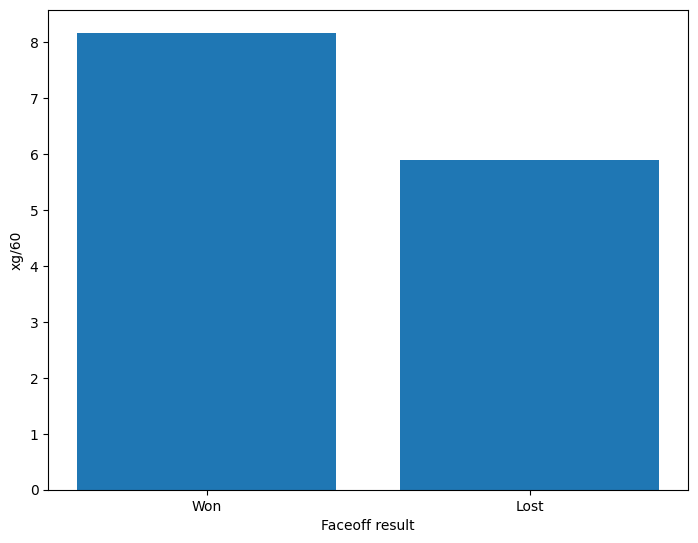

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
outcome = ['Won', 'Lost']
xg60 = [xg60win,xg60lose]
ax.bar(outcome,xg60)
ax.set_ylabel('xg/60')
ax.set_xlabel('Faceoff result')
plt.show()